('Number of observations in the training data:', 116)
('Number of observations in the test data:', 34)
this
Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2]
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
1    setosa
2    setosa
4    setosa
8    setosa
9    setosa
Name: species, dtype: category
Categories (3, object): [setosa, versicolor, virginica]
Predicted Species  setosa  versicolor  virginica
Actual Species                                  
setosa             

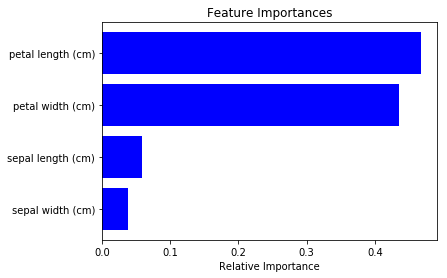

['setosa' 'versicolor' 'virginica']


In [9]:
# Load the library with the iris dataset
from sklearn.datasets import load_iris

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

import graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Create an object called iris with the iris data
iris = load_iris()

# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
# print df

# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
# print df

# Create a new column that for each row, generates a random number between 0 and 1, and
# if that value is less than or equal to .75, then sets the value of that cell as True
# and false otherwise. This is a quick and dirty way of randomly assigning some rows to
# be used as the training data and some as the test data.
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
# print df

# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

# Create a list of the feature column's names
features = df.columns[:4]
print 'this'
print features

# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]
print y

# Create a random forest classifier. By convention, clf means 'classifier'
clf = RandomForestClassifier(n_estimators=20, n_jobs=2)

####
#RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#            max_depth=None, max_features='auto', max_leaf_nodes=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
#            oob_score=False, random_state=None, verbose=0,
#            warm_start=False)
###

# Train the classifier to take the training features and learn how they relate
# to the training y (the species)
clf.fit(train[features], y)

# Apply the classifier we trained to the test data (which, remember, it has never seen before)
print clf.predict(test[features])

# View the predicted probabilities of the first 10 observations
print clf.predict_proba(test[features])[0:10]

# Create actual english names for the plants for each predicted plant class
preds = iris.target_names[clf.predict(test[features])]

# View the PREDICTED species for the first five observations
print preds[0:5]

# View the ACTUAL species for the first five observations
print test['species'].head()

# Create confusion matrix
print pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])


#Compute prediction accuracy 
numOfCorrectPrediction = (preds == np.array(test['species'])).sum() 
#print (preds == np.array(test['species']))
numOfDataSamples = test[features].shape[0]  
print "Accuracy:\t%f"%(numOfCorrectPrediction / float(numOfDataSamples))


####
## Visualize the first estimator tree of the random forest
####
#dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,\
#                       feature_names=iris.feature_names,\
#                       class_names=iris.target_names,\
#                       filled=True, rounded=True,\
#                       special_characters=True)
#graph = graphviz.Source(dot_data)
#graph.render("iris_rf0")
#graph.view("iris_rf0")


####
## Computing variable importance
####

# View a list of the features and their importance scores
print list(zip(train[features], clf.feature_importances_))


# plotting variable importance
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()


print iris.target_names



